<a href="https://colab.research.google.com/github/ksdtt/ml-pet-projects/blob/main/diamonds_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 2. Регрессия (бриллианты)**


1. Загрузите [набор данных о бриллиантах](https://www.kaggle.com/datasets/shivam2503/diamonds)
2. Создайте ноутбук в Google Colab и подключите к нему скачанный набор данных.
3. Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.
4. Определите наличие пропусков и дубликатов в данных. При необходимости заполните пропуски и удалите дубликаты.
5. Визуализируйте распределение некоторых признаков.
6. Проверьте наличие отклонений и аномалий в распределении значений признаков.  При необходимости удалите их.
7. Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.
8. Визуализируйте зависимости в признаках.
9. Постройте "тепловую карту" зависимости признаков.
10. Нормализуйте признаки.
11. Постройте линейную регрессию. Оцените результат с помощью метрик r2 и MSE.
12. Постройте полиномиальную регрессию. Сравните результаты с предыдущими.
13. Сравните результаты при различных вариантах работы с категориальными признаками: удаление, кодирование LabelEncoding, OneHotEncoding, OrdinalEncoder. Объясните полученные результаты.
14. Используйте SGDRegressor и оцените результат.
15. Используйте другой тип регрессии (на ваш выбор) и сравните результаты.

## Чтение данных

In [ ]:
import pandas as pd
import seaborn as sns
sns.set()
import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/python/diamonds.csv')

Mounted at /content/drive


In [ ]:
'''data = pd.read_csv('python/diamonds.csv')'''
data.shape

(53940, 11)

## Описание датасета

In [ ]:
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Описание датасета:**

53940 строк и 11 столбцов, 3 категориальных признака, остальные числовые

* price -> price in US dollars (\$ 326-$ 18823) -> цена в долларах США
* carat -> weight of the diamond (0.2--5.01)  -> вес в каратах
* cut   -> quality of the cut (Fair, Good, Very Good, Premium, Ideal)  -> качество среза
* color -> diamond colour, from J (worst) to D (best)  -> цвет
* clarity -> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))  -> измерение чистоты алмаза
* x -> length in mm (0--10.74)  -> длина 
* y -> width in mm (0--58.9)  -> ширина
* z -> depth in mm (0--31.8)  -> высота
* depth -> total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  -> процент общей глубины
* table ->  width of top of diamond relative to widest point (43--95)  -> ширина вершины ромба относительно самой широкой точки



In [ ]:
data.drop(columns='Unnamed: 0', inplace=True)
data.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

## Первичное статистическое исследование количественных и категориальных признаков

In [ ]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Может ли быть такое, что у бриллианта нулевая длина/ширина/высота?.. Это кажется подозрительным, поэтому стоит убрать из рассмотрения такие экземпляры. 


Как видно ниже, таких экземпляров всего 20 и мы исключили их из наших данных

In [ ]:
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)]
data.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [ ]:
data.describe(include='O')

cut  color clarity
count   53920  53920   53920
unique      5      7       8
top     Ideal      G     SI1
freq    21548  11284   13063

## Наличие пропусков и способы их заполнения. Дубликаты

### Пропуски

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Пропусков нет

### Дубликаты

In [ ]:
print(f'Количество дубликатов в данных = {len(data[data.duplicated()])}')
data.drop_duplicates(inplace=True)

Количество дубликатов в данных = 145


## Визуализация распределений признаков

* price  -> цена в долларах США
* carat -> вес в каратах
* cut (Fair, Good, Very Good, Premium, Ideal)  -> качество среза
* color (J, I, H, G, F, E, D)  -> цвет
* clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)  -> измерение чистоты алмаза
* x -> длина 
* y -> ширина
* z -> высота
* depth = z / mean(x, y) = 2 * z / (x + y) -> процент общей глубины
* table -> ширина вершины ромба относительно самой широкой точки

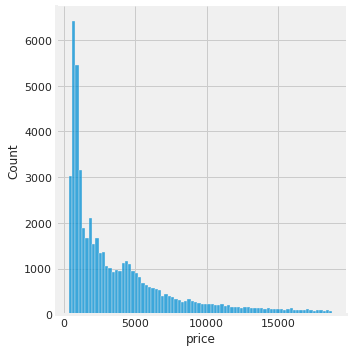

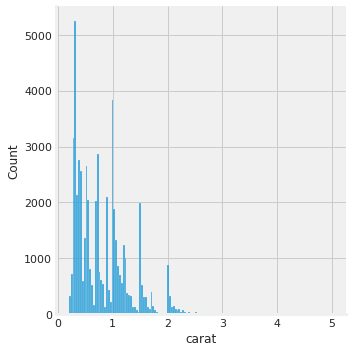

In [ ]:
sns.displot(x='price', data=data);

sns.displot(x='carat', data=data);

Похоже, здесь имеем смесь распределений, и цена, как и вес зависят от других признаков

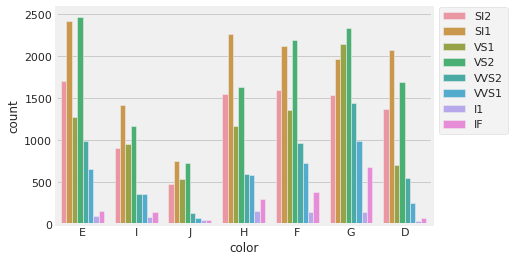

In [ ]:
sns.countplot(data=data, x='color', hue='clarity');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad= 0); 

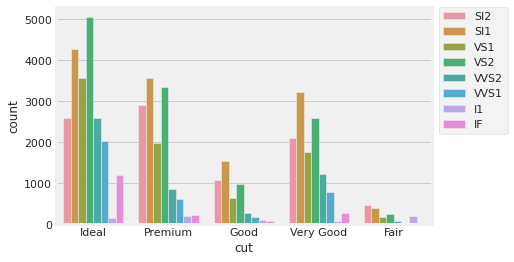

In [ ]:
sns.countplot(data=data, x='cut', hue='clarity');
plt.legend(bbox_to_anchor=( 1.02 , 1 ), loc='upper left', borderaxespad= 0 );

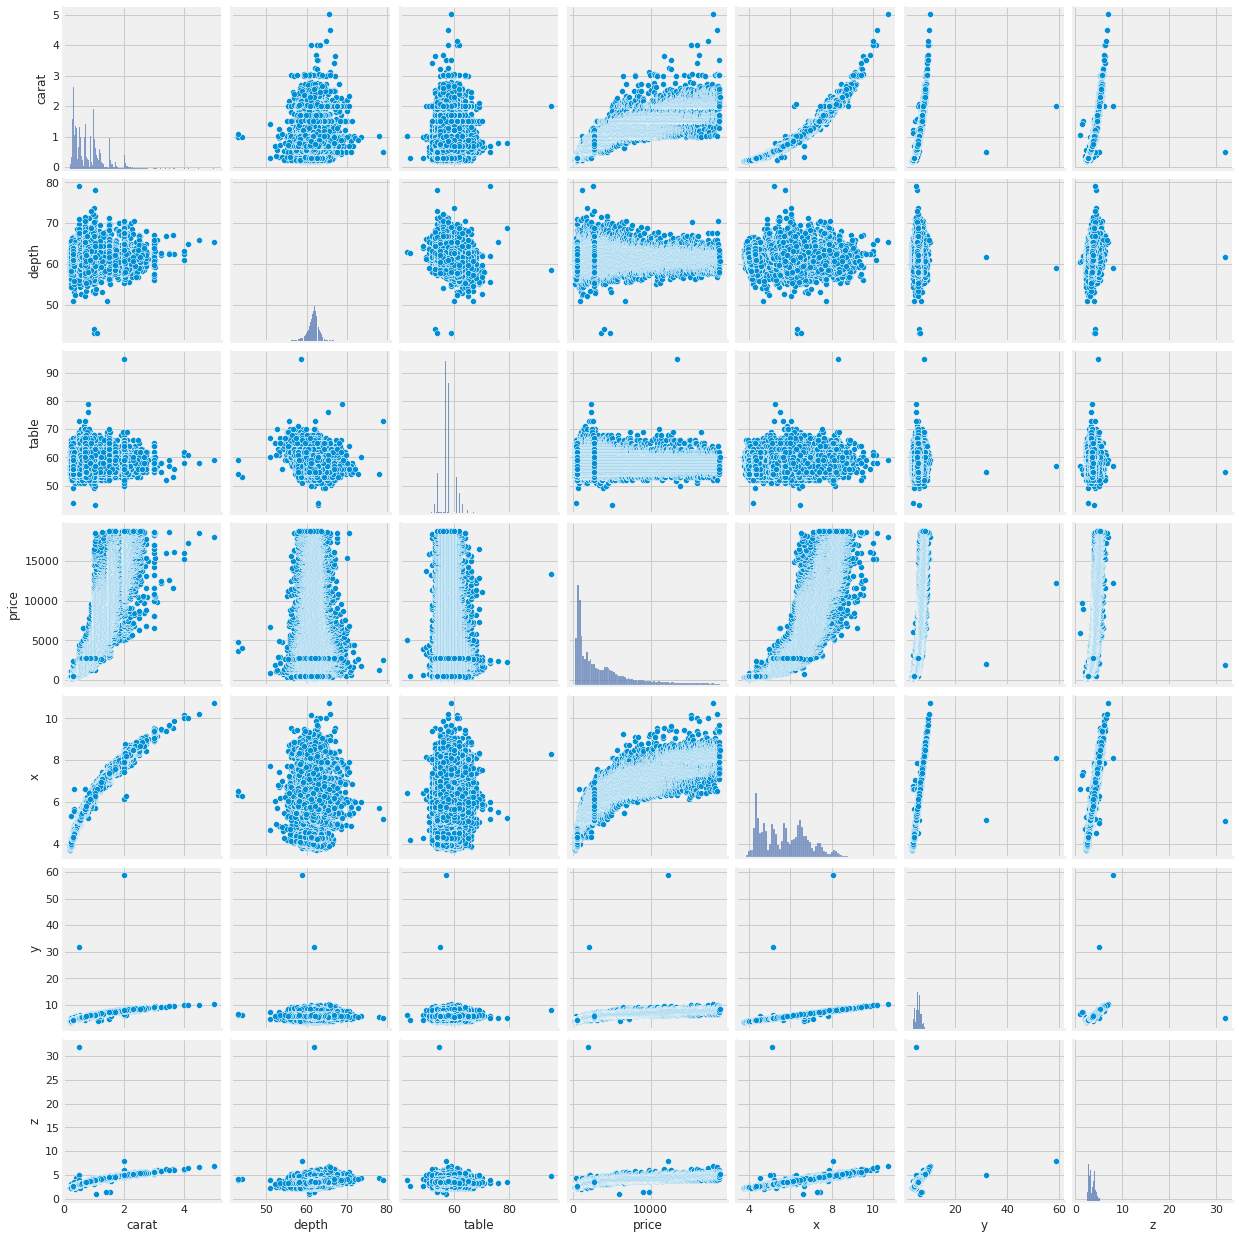

In [ ]:
sns.pairplot(data);

## Выбросы и аномалии

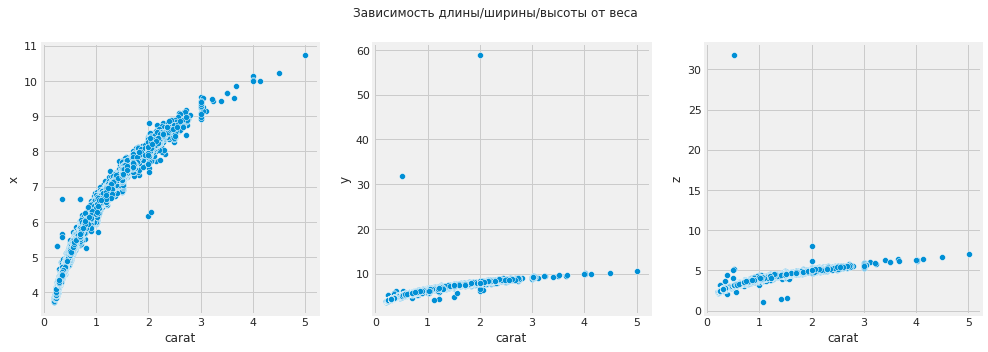

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data=data, x='carat', y='x', ax=ax[0])

sns.scatterplot(data=data, x='carat', y='y', ax=ax[1])

sns.scatterplot(data=data, x='carat', y='z', ax=ax[2])

plt.suptitle('Зависимость длины/ширины/высоты от веса')
plt.show()

In [ ]:
data.loc[(data['z'] > 30) | (data['y'] > 30)]

carat        cut color clarity  depth  table  price     x      y      z
24067   2.00    Premium     H     SI2   58.9   57.0  12210  8.09  58.90   8.06
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   5.15  31.80
49189   0.51      Ideal     E     VS1   61.8   55.0   2075  5.15  31.80   5.12

Удалим эти строки и посмотрим ещё раз на графики

In [ ]:
data.drop(index=[24067, 48410, 49189], inplace=True)

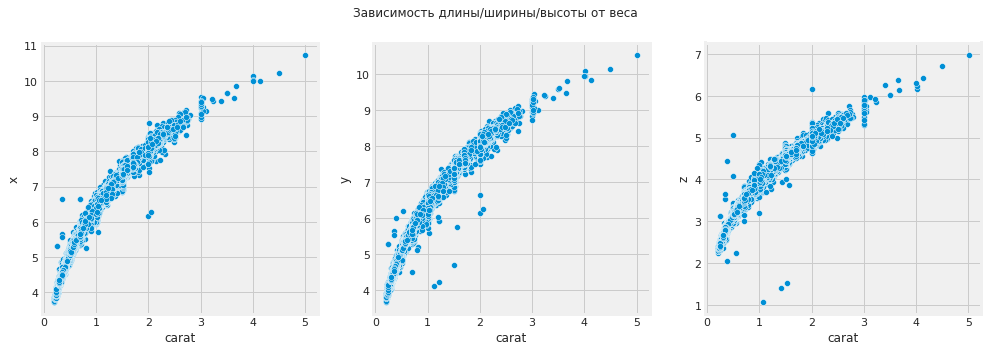

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data=data, x='carat', y='x', ax=ax[0])

sns.scatterplot(data=data, x='carat', y='y', ax=ax[1])

sns.scatterplot(data=data, x='carat', y='z', ax=ax[2])

plt.suptitle('Зависимость длины/ширины/высоты от веса')
plt.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=data['x'], name='x, длина', boxpoints='all'))
fig.add_trace(go.Box(x=data['y'], name='y, ширина', boxpoints='all'))
fig.add_trace(go.Box(x=data['z'], name='z, высота', boxpoints='all'))

In [ ]:
index_ = data.index[(data['x'] > 9.26) | (data['y'] > 9.26) | (data['z'] > 5.69) | (data['z'] < 1.41)].tolist()

data.drop(index=index_, inplace=True)

data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53734 rows x 10 columns]

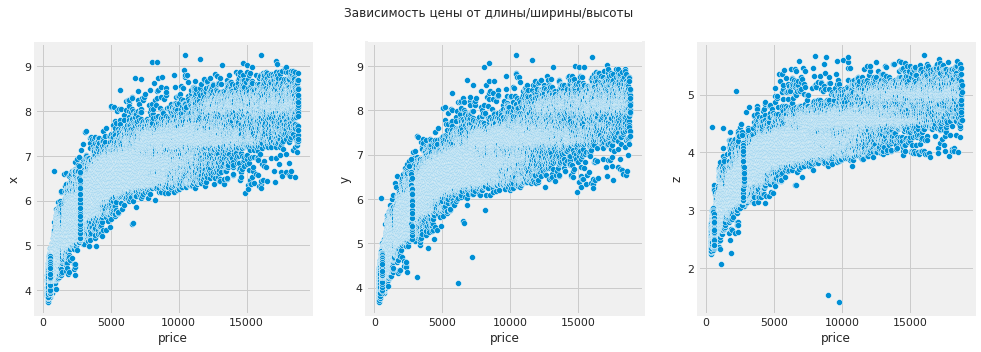

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.scatterplot(data=data, x='price', y='x', ax=ax[0])

sns.scatterplot(data=data, x='price', y='y', ax=ax[1])

sns.scatterplot(data=data, x='price', y='z', ax=ax[2])

plt.suptitle('Зависимость цены от длины/ширины/высоты')
plt.show()

In [ ]:
data.drop(index=data.index[data['z'] < 2].tolist(), inplace=True)

data

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53732 rows x 10 columns]

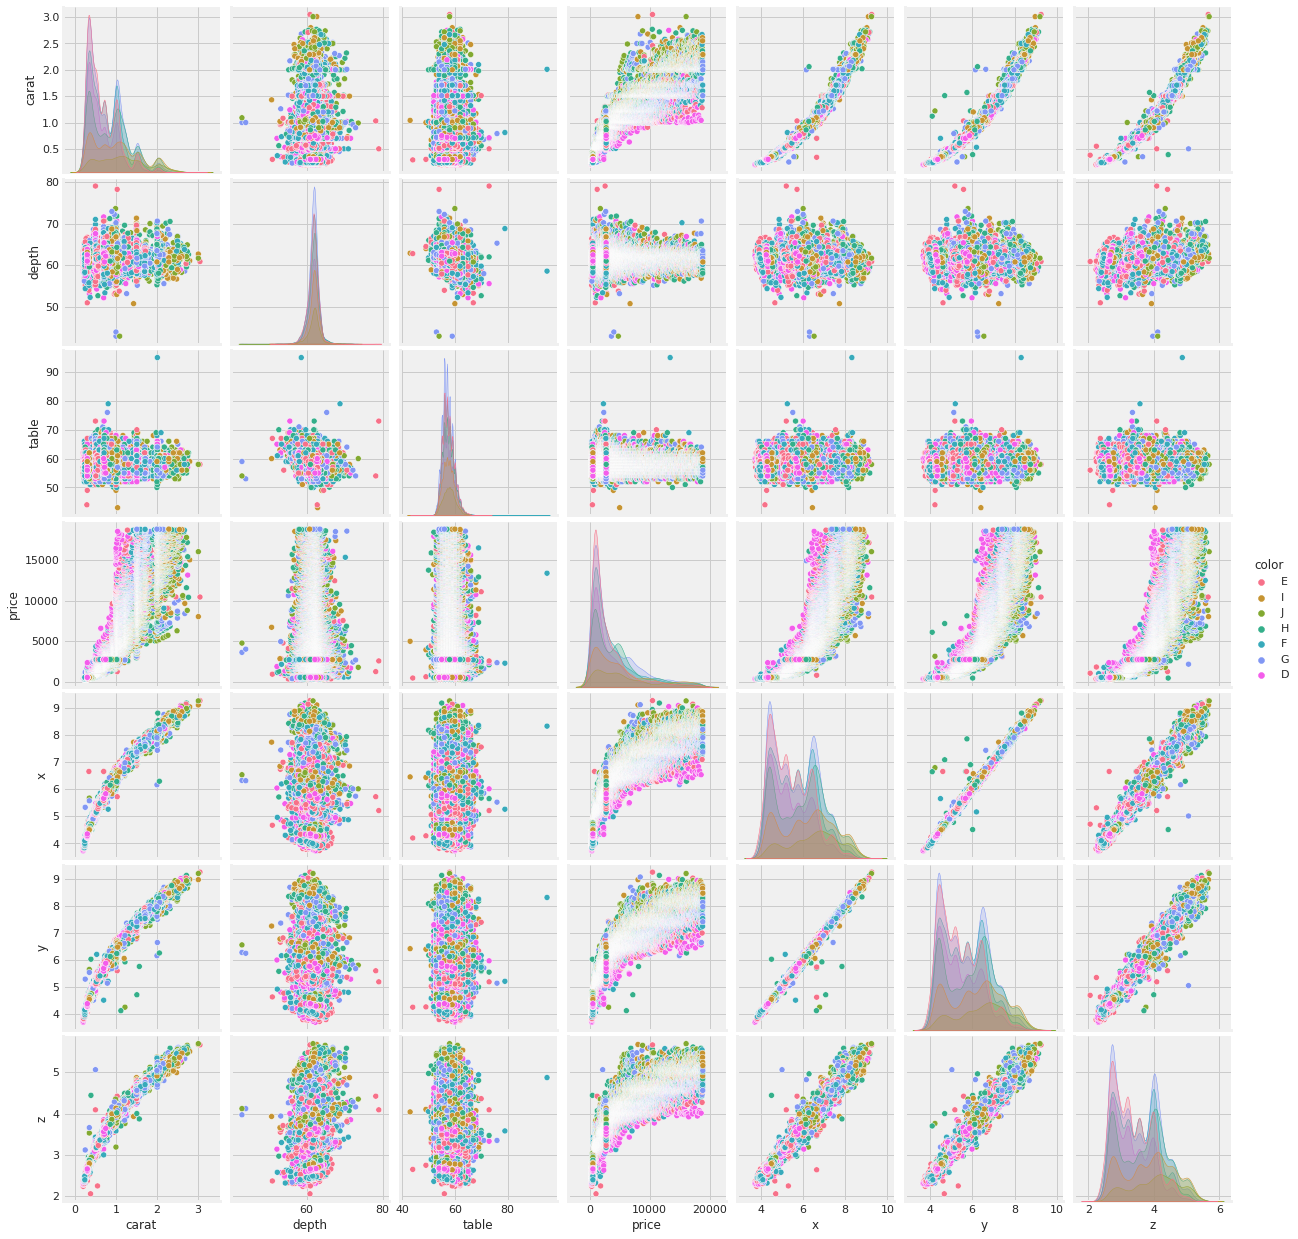

In [ ]:
#sns.pairplot(data, kind='scatter');
sns.pairplot(data, hue='color');

## Кодирование категориальных признаков

* cut (Fair, Good, Very Good, Premium, Ideal)  -> качество среза
* color (J, I, H, G, F, E, D)  -> цвет
* clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)  -> измерение чистоты алмаза

In [ ]:
swap = {"cut":     {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4},
        "color":   {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6},
        "clarity": {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
        }

data1 = data.copy()
# map
data.replace(swap, inplace=True)
data.head(10)

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      5        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75
5   0.24    2      0        5   62.8   57.0    336  3.94  3.96  2.48
6   0.24    2      1        6   62.3   57.0    336  3.95  3.98  2.47
7   0.26    2      2        2   61.9   55.0    337  4.07  4.11  2.53
8   0.22    0      5        3   65.1   61.0    337  3.87  3.78  2.49
9   0.23    2      2        4   59.4   61.0    338  4.00  4.05  2.39

## Визуализация зависимостей в признаках

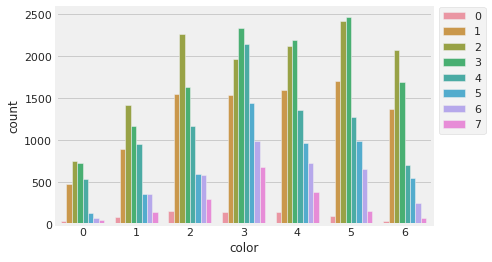

In [ ]:
sns.countplot(data=data, x='color', hue='clarity');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad= 0);

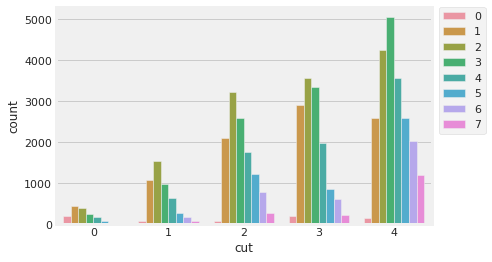

In [ ]:
sns.countplot(data=data, x='cut', hue='clarity');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad= 0);

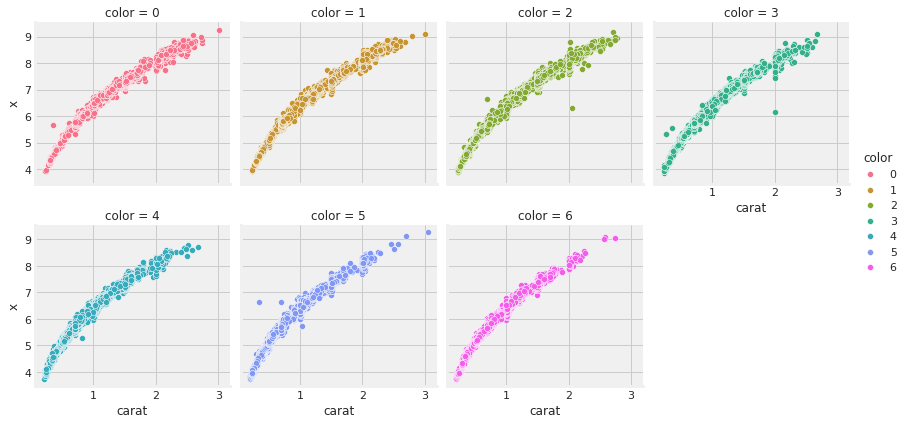

In [ ]:
grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "carat", "x")
grid.add_legend();

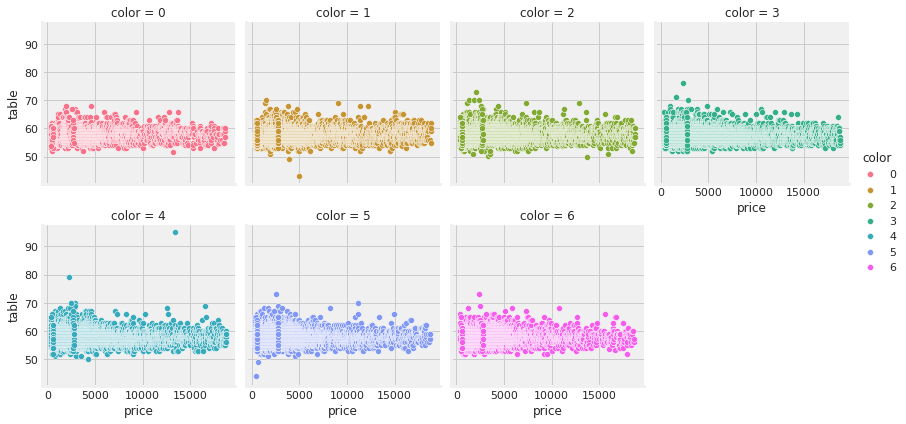

In [ ]:
grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "price", "table")
grid.add_legend();

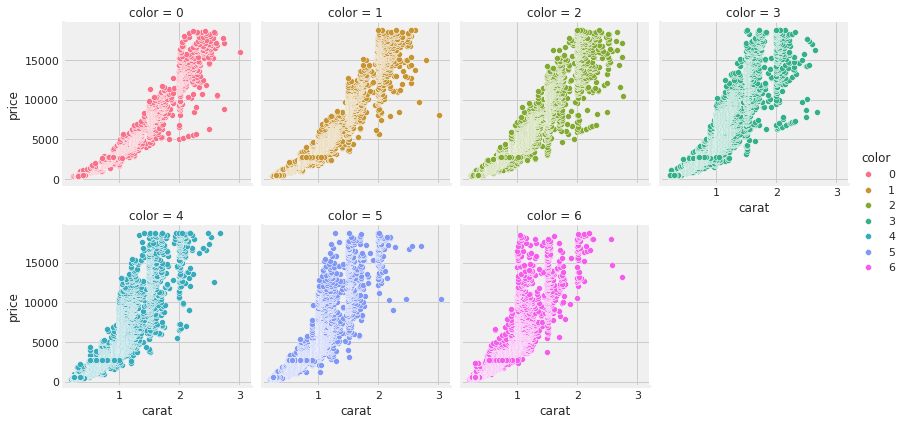

In [ ]:
grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "carat", "price")
grid.add_legend();

Удалим ещё немного выбросов:

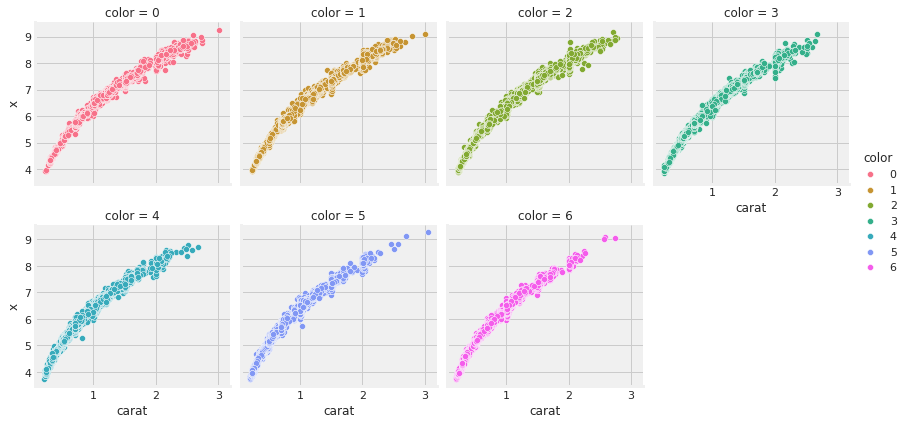

In [ ]:
index_ = data.index[((data['color'] == 0) & (data['x'] > 5.5) & (data['x'] < 6) & (data['carat'] < 0.5))|
                ((data['color'] == 2) & (data['x'] > 6) & (data['x'] < 6.5) & (data['carat'] > 2))|
                ((data['color'] == 2) & (data['x'] < 7) & (data['x'] > 6.6) & (data['carat'] > 0.5) & (data['carat'] < 0.9))|
                ((data['color'] == 3) & (data['x'] > 5) & (data['x'] < 6) & (data['carat'] < 0.4))|
                ((data['color'] == 3) & (data['x'] > 6) & (data['x'] < 6.3) & (data['carat'] == 2))|
                ((data['color'] == 5) & (data['x'] > 6.5) & (data['x'] < 7) & (data['carat'] < 0.85))].tolist()

data.drop(index=index_, inplace=True)

grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "carat", "x")
grid.add_legend();

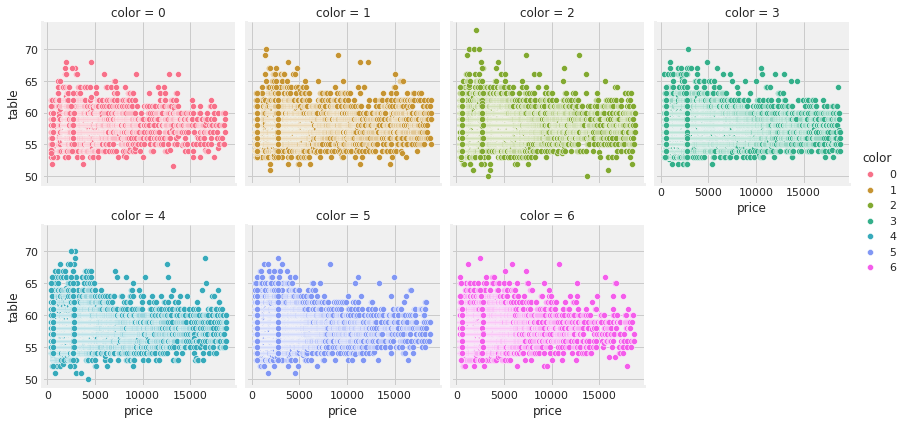

In [ ]:
index_ = data.index[((data['color'] == 1) & (data['table'] < 50)) |
                ((data['color'] == 3) & (data['table'] > 70)) |
                ((data['color'] == 4) & (data['table'] > 75)) |
                ((data['color'] == 5) & ((data['table'] < 50) | (data['table'] >= 70)))|
                ((data['color'] == 6) & (data['table'] > 70)) |
                ((data['color'] == 5) & (data['x'] > 6.5) & (data['x'] < 7) & (data['carat'] < 0.85))].tolist()

data.drop(index=index_, inplace=True)

grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "price", "table")
grid.add_legend();

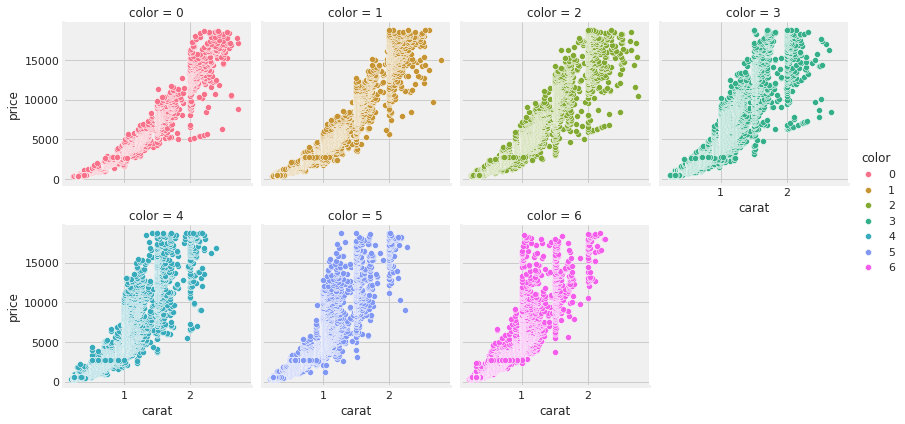

In [ ]:
index_ = data.index[((data['color'] == 6) & (data['carat'] > 2.4)) |
                    ((data['color'] == 5) & (data['carat'] > 2.4)) |
                    ((data['color'] == 4) & (data['carat'] > 2.4)) |
                    ((data['color'] == 1) & (data['carat'] > 2.9)) |
                    ((data['color'] == 0) & (data['carat'] > 2.9))].tolist()

data.drop(index=index_, inplace=True)

grid = sns.FacetGrid(data, col="color", hue="color", col_wrap=4)
grid.map(sns.scatterplot, "carat", "price")
grid.add_legend();

## Тепловая карта зависимостей признаков

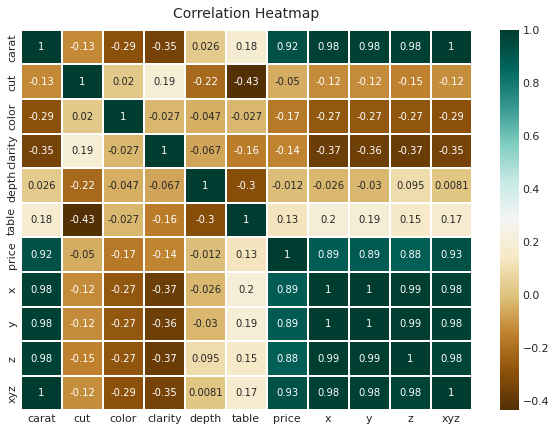

In [ ]:
heatmap = plt.figure(figsize=(9, 7)) 

data['xyz'] = data['x']*data['y']*data['z']/3

heatmap = sns.heatmap(data.corr(), annot=True, cmap="BrBG", linewidths=0.1)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Удалим сильно коррелирующие признаки: x, y, z

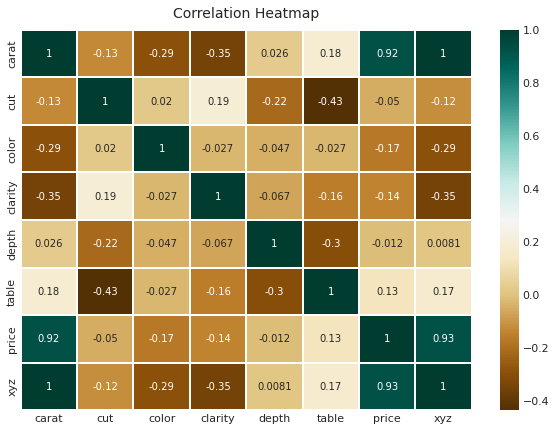

In [ ]:
data.pop('x')
data.pop('y')
data.pop('z')

heatmap = plt.figure(figsize=(9, 7)) 

heatmap = sns.heatmap(data.corr(), annot=True, cmap="BrBG", linewidths=0.1)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

## Нормализация признаков

In [ ]:
#numeric = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

numeric = ['carat', 'depth', 'table', 'price', 'xyz']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaler = data.copy()

data_scaler[numeric] = scaler.fit_transform(data_scaler[numeric])
data_scaler.head()

carat  cut  color  clarity     depth     table     price       xyz
0 -1.208941    4      5        1 -0.173693 -1.107028 -0.905012 -1.208106
1 -1.251718    3      5        2 -1.367156  1.598619 -0.905012 -1.257058
2 -1.208941    1      5        4 -3.403063  3.402383 -0.904760 -1.209764
3 -1.080609    3      1        3  0.458140  0.245795 -0.902998 -1.095235
4 -1.037832    1      0        1  1.089973  0.245795 -0.902746 -1.026464

## Построение линейной регрессии. Оценка результата с помощью метрик r2 и MSE.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

(array([[-1.20894068],
        [-1.25171782],
        [-1.20894068],
        ...,
        [-0.20367779],
        [ 0.13853936],
        [-0.09673493]]),
 array([-0.90501196, -0.90501196, -0.90476016, ..., -0.29286726,
        -0.29286726, -0.29286726]))

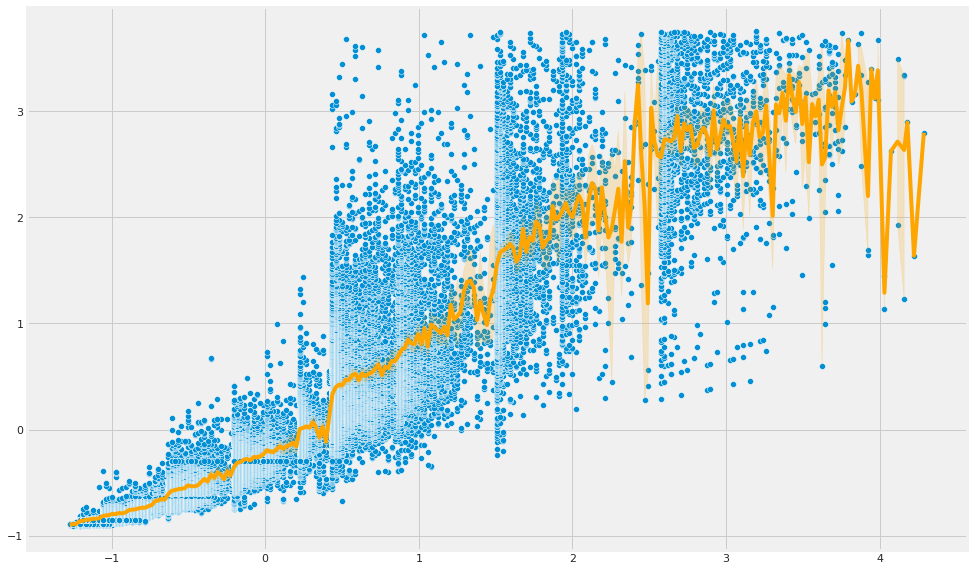

In [ ]:
X = data_scaler[['carat']].values
y = data_scaler['price'].values

fig = plt.figure(figsize=(15, 10)) 

fig = sns.scatterplot(x=X.ravel(), y=y);
fig = sns.lineplot(x=X.ravel(), y=y, color='orange');

X, y

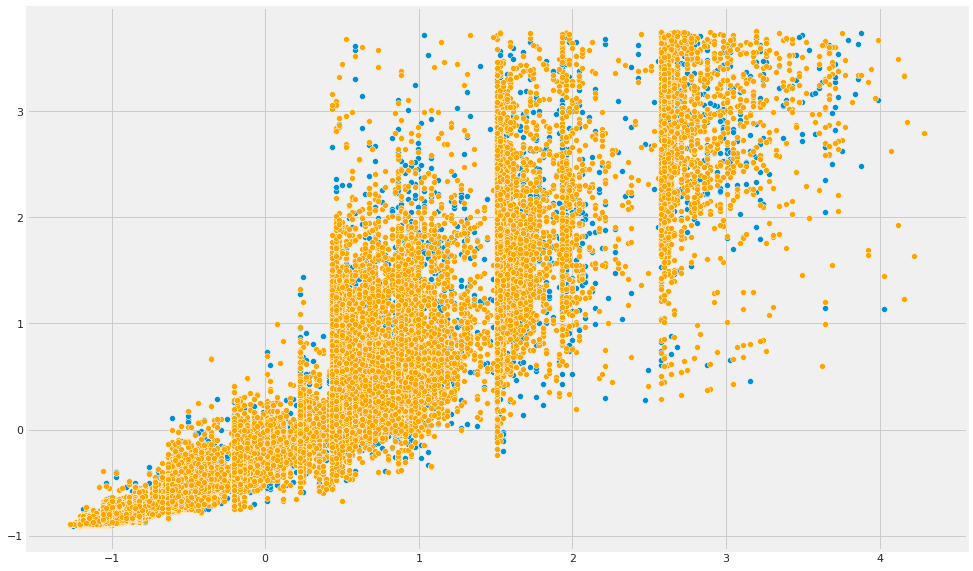

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig = plt.figure(figsize=(15, 10)) 

fig = sns.scatterplot(x=X_test.ravel(), y=y_test)
fig = sns.scatterplot(x=X_train.ravel(), y=y_train, color='orange');

r2: 0.8498790577840898
mse: 0.145972370141846


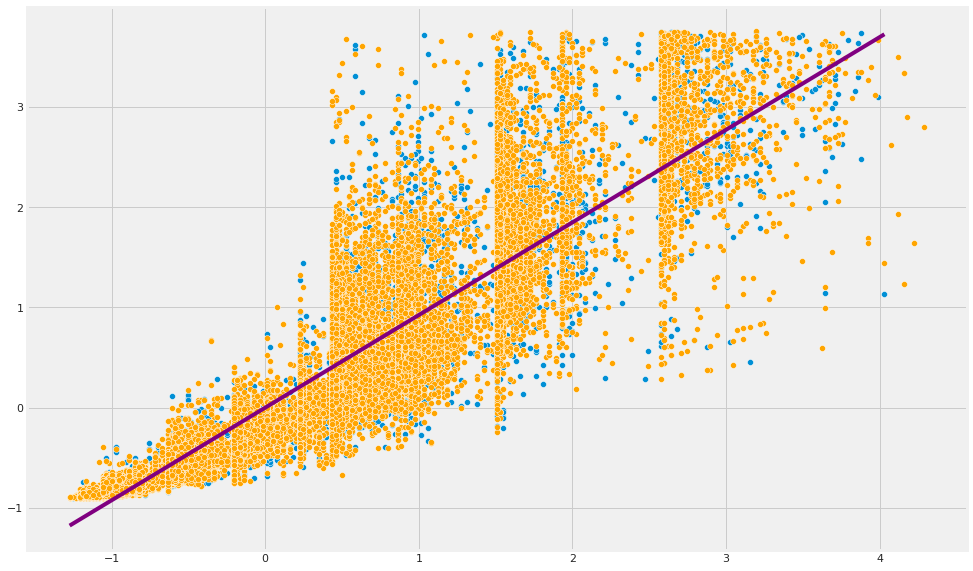

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print(f'r2: {r2_score(y_test, y_pred)}')
print(f'mse: {mean_squared_error(y_test, y_pred)}')

fig = plt.figure(figsize=(15, 10)) 

fig = sns.scatterplot(x=X_test.ravel(), y=y_test)
fig = sns.scatterplot(x=X_train.ravel(), y=y_train, color='orange')
fig = sns.lineplot(x=X_test.ravel(), y=y_pred, color='purple');

## Построение полиномиальной регрессии. Сравнение результата с предыдущими.


r2: 0.8701718622297495
mse: 0.12982813777025048


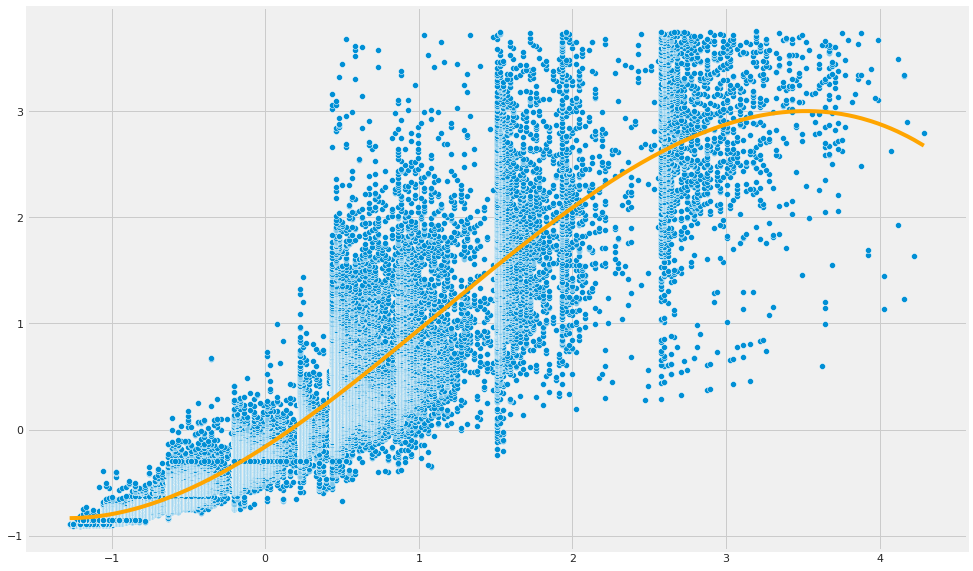

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

y_p = poly_model.predict(X_poly)

print(f'r2: {r2_score(y, y_p)}')
print(f'mse: {mean_squared_error(y, y_p)}')

fig = plt.figure(figsize=(15, 10)) 

fig = sns.scatterplot(x=X.ravel(), y=y);
fig = sns.lineplot(x=X.ravel(), y=y_p, color='orange');

## Сравните результаты при различных вариантах работы с категориальными признаками: удаление, кодирование LabelEncoding, OneHotEncoding, OrdinalEncoder. Объясните полученные результаты.

LabelEncoding и OrdinalEncoder различие?

**LabelEncoder**

In [ ]:
X = data_scaler.loc[:, data_scaler.columns !='price'].values
y = data_scaler['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

print('линейная регрессия:\n')
slr = LinearRegression()

slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}\n\n')

print('полиномиальная регрессия:\n')
poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

y_p = poly_model.predict(X_poly)


print(f'r2: {r2_score(y, y_p)}, mse: {mean_squared_error(y, y_p)}')

линейная регрессия:

r2: 0.9101685028844583, mse: 0.09054907693032609


полиномиальная регрессия:

r2: 0.9749611463957744, mse: 0.025038853604225583


**OneHotEncoding**

In [ ]:
categorical = [i for i in data1.columns if data1[i].dtype.name == 'object'] 

data1['xyz'] = data1['x']*data1['y']*data1['z']/3
data1.pop('x')
data1.pop('y')
data1.pop('z')

data_cat = data1.copy()
data_cat = pd.get_dummies(data_cat, columns=categorical)

data_cat.head()

carat  depth  table  price        xyz  cut_Fair  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  12.734010         0         0          1   
1   0.21   59.8   61.0    326  11.501952         0         0          0   
2   0.23   56.9   65.0    327  12.692295         0         1          0   
3   0.29   62.4   58.0    334  15.574860         0         0          0   
4   0.31   63.3   58.0    335  17.305750         0         1          0   

   cut_Premium  cut_Very Good  ...  color_I  color_J  clarity_I1  clarity_IF  \
0            0              0  ...        0        0           0           0   
1            1              0  ...        0        0           0           0   
2            0              0  ...        0        0           0           0   
3            1              0  ...        1        0           0           0   
4            0              0  ...        0        1           0           0   

   clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  \
0            0            1            0            0             0   
1            1            0            0            0             0   
2            0            0            1            0             0   
3            0            0            0            1             0   
4            0            1            0            0             0   

   clarity_VVS2  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 25 columns]

In [ ]:
scaler = StandardScaler()

data_scaler = data_cat.copy()

data_scaler[numeric] = scaler.fit_transform(data_scaler[numeric])

X = data_scaler.loc[:, data_scaler.columns !='price'].values
y = data_scaler['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

print('линейная регрессия:\n')
slr = LinearRegression()

slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}\n\n')

print('полиномиальная регрессия:\n')
poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

y_p = poly_model.predict(X_poly)


print(f'r2: {r2_score(y, y_p)}, mse: {mean_squared_error(y, y_p)}')

линейная регрессия:

r2: 0.9186192200653698, mse: 0.08241673022336728


полиномиальная регрессия:

r2: 0.9785427659302681, mse: 0.02145723406973186


**Удаление категориальных признаков**

In [ ]:
data2 = data1.copy()
data2 = data2[list(numeric)]

scaler = StandardScaler()

data_scaler = data2.copy()

data_scaler[numeric] = scaler.fit_transform(data_scaler[numeric])
data_scaler.head()

carat     depth     table     price       xyz
0 -1.207338 -0.173417 -1.100678 -0.904758 -1.206718
1 -1.250016 -1.364121  1.586931 -0.904758 -1.255566
2 -1.207338 -3.395323  3.378670 -0.904507 -1.208372
3 -1.079305  0.456956  0.243126 -0.902746 -1.094088
4 -1.036627  1.087329  0.243126 -0.902495 -1.025464

In [ ]:
X = data_scaler.loc[:, data_scaler.columns !='price'].values
y = data_scaler['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

print('линейная регрессия:\n')
slr = LinearRegression()

slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}\n\n')

print('полиномиальная регрессия:\n')
poly_features = PolynomialFeatures(degree=3)  
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y)

y_p = poly_model.predict(X_poly)


print(f'r2: {r2_score(y, y_p)}, mse: {mean_squared_error(y, y_p)}')

линейная регрессия:

r2: 0.8585820900957779, mse: 0.1432181129093486


полиномиальная регрессия:

r2: 0.8798726601508184, mse: 0.12012733984918156


**Вывод:**

При построении **двумерной** регрессии точность у *линейной* составляет 0.8491209859310446, у *полиномиальной* (3я степень) - 0.8704350037219307. И в том, и в другом случае используется **LabelEncoder**. 

В **многомерном** случае (**LabelEncoder**) получается точность *линейная*: 0.9082083567217156, *полиномиальная*: 0.9745925107286029. Что уже лучше, чем при двумерной реализации. 

При использовании  **OneHotEncoding** в многомерном случае: *линейная*: 0.9186192200653698, *полиномиальная*: 0.9785433418052784.

Если **удалить категориальные признаки**, то *линейная*: 0.8585820900957779, *полиномиальная*: 0.8798726601508184.

Таким образом, наилучшая точность наблюдается при использовании **OneHotEncoding** кодирования категориальных признаков для полиномиальной регрессии.

----------
(с ещё одним удалением выбросов)

**Вывод-1:**

При построении **двумерной** регрессии точность у *линейной* составляет 0.8498790577840898, у *полиномиальной* (3я степень) - 0.8701718622297495. И в том, и в другом случае используется **LabelEncoder**. 

В **многомерном** случае получается точность *линейная*: 0.9101685028844583, *полиномиальная*: 0.9749611463957744. Что уже лучше, чем при двумерной реализации. 

При использовании  **OneHotEncoding** в многомерном случае: *линейная*: 0.9186192200653698, *полиномиальная*: 0.9785433418052784.

Если **удалить категориальные признаки**, то *линейная*: 0.8585820900957779, *полиномиальная*: 0.8798726601508184.

Наилучшая точность всё равно наблюдается при использовании **OneHotEncoding** кодирования категориальных признаков для полиномиальной регрессии. Но в случае двумерной линейной регрессии точность улучишлась, и в случае многомерной регрессии (кодирование **LabelEncoder**) точность тоже улучшилась как для двумерной, так и для многомерной регрессии.

## Используйте SGDRegressor и оцените результат. (стохастический градиентный спуск)




In [ ]:
from sklearn.linear_model import SGDRegressor
import numpy as np

scaler = StandardScaler()

data_scaler = data_cat.copy()

data_scaler[numeric] = scaler.fit_transform(data_scaler[numeric])

X = data_scaler.loc[:, data_scaler.columns !='price'].values
y = data_scaler['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

linear_regression_model = SGDRegressor(tol=.0001, eta0=.01) 

linear_regression_model.fit(X_train, y_train)

y_pred = linear_regression_model.predict(X_test)

print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}')

r2: 0.9176939360003808, mse: 0.08335379284706572


(без дополнительного убора выбросов) 

r2: 0.9183856242520693, mse: 0.0826532996337558

In [ ]:
columns_ = data_scaler.loc[:, data_scaler.columns !='price'].columns
columns_

Index(['carat', 'depth', 'table', 'xyz', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [ ]:
from sklearn.utils import resample

n_bootstraps = 1000 
bootstrap_X = [] 
bootstrap_y = [] 

for _ in range(n_bootstraps): 
    sample_X, sample_y = resample(X, y)
    bootstrap_X.append(sample_X) 
    bootstrap_y.append(sample_y)

In [ ]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = [] 

for i, data_scaler in enumerate(bootstrap_X):
    linear_regression_model.fit(data_scaler, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)
    
coef_df = pd.DataFrame(coeffs, columns=columns_) 

'''fig = plt.figure(figsize=(15, 10)) 
fig = coef_df.plot(kind='box'); 
plt.xticks(rotation=90);'''

"fig = plt.figure(figsize=(15, 10)) \nfig = coef_df.plot(kind='box'); \nplt.xticks(rotation=90);"

In [ ]:
y_pred = linear_regression_model.predict(X_test)
print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}')

r2: 0.918532609350882, mse: 0.08250444346347295


Точность улучшилась

## Используйте другой тип регрессии (на ваш выбор) и сравните результаты.

In [ ]:
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(alphas=[.0005, 0.001], l1_ratio=[.1, .3, .4, .5, .55, .7, .9, .95, .99, 1], fit_intercept=False,
                     selection='random')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print(f'r2: {r2_score(y_test, y_pred)}, mse: {mean_squared_error(y_test, y_pred)}')

r2: 0.9185656386196853, mse: 0.08247099374305211
